In [18]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import tqdm

In [3]:
M = 2 #入力データの次元
K = 3 #クラス数
n = 100 #クラスごとのデータ数
N = n * K #全データ数

In [7]:
#サンプルデータ生成
X1 = np.random.randn(n,M) + np.array([0,10])
X2 = np.random.randn(n,M) + np.array([5,5])
X3 = np.random.randn(n,M) + np.array([10,0])
Y1 = np.array([[1,0,0] for i in range(n)])
Y2 = np.array([[0,1,0] for i in range(n)])
Y3 = np.array([[0,0,1] for i in range(n)])

X = np.concatenate((X1,X2,X3), axis=0)
Y = np.concatenate((Y1,Y2,Y3), axis=0)

In [9]:
import holoviews as hv
hv.extension('matplotlib')

%opts magic unavailable (pyparsing cannot be imported)
%compositor magic unavailable (pyparsing cannot be imported)


:Points   [x,y]
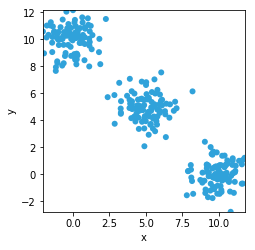

In [10]:
hv.Points(X)

In [11]:
W = tf.Variable(tf.zeros([M,K]))
b = tf.Variable(tf.zeros([K]))

In [12]:
x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x,W) + b) # sigmoidをsoftmaxで置き換え

In [13]:
#tf.reduce_meanでミニバッチごとの平均値を求める
#reduction_indicesは行列のどの方向に向かって和をとるかを表す
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))

In [14]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [15]:
#argmax(y,1)=argmax(t,1)となるか評価
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(t,1))

In [16]:
batch_size = 50 #ミニバッチサイズ
n_batches = N // batch_size

In [17]:
# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [20]:
#学習
for epoch in range(20):
    X_, Y_ = shuffle(X,Y)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end],
        })

In [21]:
classified = correct_prediction.eval(session=sess,feed_dict={
    x:X_[0:10],
    t:Y_[0:10],
})

In [22]:
prob = y.eval(session=sess, feed_dict={
    x:X_[0:10]
})

In [23]:
print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  3.86683130e-09   7.01716263e-03   9.92982864e-01]
 [  3.66808223e-10   2.24150904e-03   9.97758508e-01]
 [  2.39899661e-03   8.41779351e-01   1.55821666e-01]
 [  7.52182584e-03   9.65103447e-01   2.73746867e-02]
 [  1.85269327e-03   6.53696060e-01   3.44451189e-01]
 [  8.55072187e-07   1.56911671e-01   8.43087435e-01]
 [  2.77007750e-09   1.61409117e-02   9.83859122e-01]
 [  3.34604122e-09   1.90576282e-03   9.98094261e-01]
 [  1.26467281e-09   2.35044281e-03   9.97649610e-01]
 [  7.58898736e-04   9.84739840e-01   1.45011824e-02]]
